# PMOD TMP2 Sensor

In this notebook, a temperature sensor is initialized and set to log a reading every 1 second.  I'll place my hand over the temperature sensor to spike the reading midway through the test.

This demo assumes the PMOD TMP2 sensor is attached to PMOD 2 labeled JC.

### 1. Simple TMP2 read() to see current room temperature

In [1]:
from pynq import Overlay
Overlay("pmod.bit").download()

In [2]:
from pynq.pmods import PMOD_TMP2

# temperature sensor is on 2nd PMOD with JC label
mytmp = PMOD_TMP2(2)
temperature = mytmp.read()

print(str(temperature) + " C")

26.6 C


### 2. Starting logging temperature once every second

In [3]:
mytmp.start_log()

### 3. Try to modify temperature reading by placing your hand over the device

Stop the logging whenever done trying to change sensor's value.

In [4]:
mytmp.stop_log()
log = mytmp.get_log()

### 4. Convert Celsius to Fahrenheit and print out values

In [5]:
temps_f = [x * 9/5 + 32 for x in log]

### 5. Plot values over time

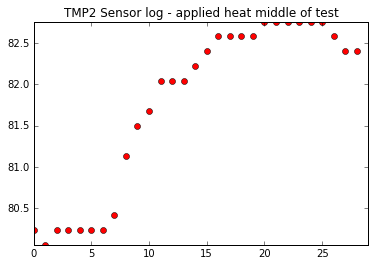

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(temps_f)), temps_f, 'ro')
plt.title('TMP2 Sensor log - applied heat middle of test')
plt.axis([0, len(temps_f), min(temps_f), max(temps_f)])
plt.show()